# **Lista de ejercicios 2 (20 de octubre, 2024)**
## Introducción a Machine Learning para CCSS

### Integrantes: 

- Victoria Olivera García (20171137)
- Víctor Manuel Raico Arce (F1092609)
- Fernando Mendoza Canal (20105246)
- Paolo Gutierrez Chochoca (F1120328)



#### **Instrucciones**

**1. Temas abordados:** Esta lista de ejercicios se enfoca en los siguientes temas: Bootstrap &
Regularization Methods.

**2. Formación de grupos:** Se permite la formación de grupos de hasta 5 integrantes. La
composición de los grupos se mantendrá constante para la lista de ejercicios 3.

**3. Puntuación de ejercicios:** La lista contiene 5 ejercicios. Cada ejercicio vale 4 puntos.

**4. Formato de entrega:** La resolución de los ejercicios debe presentarse en un archivo jupyter-notebook con todas las celdas ejecutadas.

**5. Fecha límite de entrega:** La fecha l´ımite para la entrega es el Domingo 27 de octubre a las 11:59 pm. Un representante del equipo debe subir su solucionario a la actividad correspondiente en la plataforma Canvas. Los nombres y códigos de todos los participantes deben
ser incluidos en el solucionario.

### **Libraries**

In [121]:
#!pip install mlxtend

In [277]:
# Basic
import numpy as np
import pandas as pd

# Scikit-Learn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', message="Coordinate descent without L1 regularization may lead to unexpected results and is discouraged.")
warnings.filterwarnings('ignore', category=ConvergenceWarning)

# Matplotlib
from matplotlib.pyplot import subplots

### **Pregunta 1**

#### Considere el conjunto de datos de viviendas de [Boston](https://raw.githubusercontent.com/qlabpucp/datasets/main/datasets/boston.csv):

In [279]:
ruta = "https://raw.githubusercontent.com/qlabpucp/datasets/main/datasets/boston.csv"
data = pd.read_csv(ruta)
data = data.iloc[:, 1:]

#### **a)** Defina una función llamada estimate mean que tome como argumentos un DataFrame de Pandas data, una serie de índices $idx$ y el nombre de una columna $x$. Esta función debe calcular y devolver la media de la columna $x$ para las filas correspondientes a los índices dados en el DataFrame. Utilice esta función y estime la media poblacional de la columna medv en el conjunto de datos proporcionado. Llame a esta estimación $\hat{\mu}$.

*Hint: Para estimar la media poblacional, asegúrese de incluir todos los índices del conjunto de datos en el cálculo*

In [281]:
import pandas as pd

def estimate_mean(data, idx, column):
    
    return data.loc[idx, column].mean()

# Asumiendo que tienes cargado el conjunto de datos de Boston en el DataFrame "data"
# Vamos a calcular la media poblacional de la columna 'medv' utilizando todos los índices
all_indices = data.index
mu_hat = estimate_mean(data, all_indices, 'medv')

print(f"Estimación de la media poblacional (µ̂) para la columna 'medv': {mu_hat}")

Estimación de la media poblacional (µ̂) para la columna 'medv': 22.532806324110677


#### **b)** Proporcione una estimación del error estándar de $\hat{\mu}$. Interprete este resultado. 

*Hint: Puede calcular el error estándar dividiendo la desviación estándar de la columna medv (.std()) por la raíz cuadrada del número de observaciones.*

In [283]:
# Número total de observaciones
n = len(data)

# Desviación estándar de la columna 'medv'
std_dev_medv = data['medv'].std()

# Cálculo del error estándar de la media
se_mu_hat = std_dev_medv / np.sqrt(n)

print(f"Error estándar de la media (SE(µ̂)) para la columna 'medv': {se_mu_hat}")

Error estándar de la media (SE(µ̂)) para la columna 'medv': 0.4088611474975351


#### **c)** Ahora estime el error estándar $(SE)$ de $\hat{\mu}$ usando el método Bootstrap. ¿Cómo se compara esto con su respuesta de (b)? 

*Hint: Puede modificar la funci´on boot SE para adaptarla a la función definida en (a).*

In [285]:
def bootstrap_se(data, column, num_samples=1000):
    bootstrap_means = []
    for _ in range(num_samples):
        # Generar una muestra de bootstrap (con reemplazo) del conjunto de datos
        sample = data.sample(n=len(data), replace=True)
        
        # Calcular la media de la muestra usando la función estimate_mean
        mean_sample = estimate_mean(sample, sample.index, column)
        
        # Guardar la media de la muestra
        bootstrap_means.append(mean_sample)
    
    # Calcular el error estándar como la desviación estándar de las medias de bootstrap
    return np.std(bootstrap_means)

# Calcular el error estándar Bootstrap para la media de 'medv'
se_mu_hat_bootstrap = bootstrap_se(data, 'medv')
print(f"Error estándar Bootstrap de µ̂: {se_mu_hat_bootstrap}")

Error estándar Bootstrap de µ̂: 0.6671600398245016


#### **d)** Basado en su estimación bootstrap de (c), proporcione un intervalo de confianza del 95% para la media de $medv$. 

*Hint: Puede aproximar un intervalo de confianza del 95% usando la
fórmula $\hat{\mu} − 2SE(\hat{\mu})$, $\hat{\mu} + 2SE(\hat{\mu})$.*

In [287]:
# Calculamos el límite inferior y superior del intervalo de confianza del 95%
ci_lower = mu_hat - 2 * se_mu_hat_bootstrap
ci_upper = mu_hat + 2 * se_mu_hat_bootstrap

print(f"Intervalo de confianza del 95% para la media de 'medv': [{ci_lower}, {ci_upper}]")

Intervalo de confianza del 95% para la media de 'medv': [21.198486244461673, 23.86712640375968]


#### **e)** Defina una función para estimar la mediana de una variable. Use esta función y estime la mediana poblacional de la columna $medv$. Llame a esta estimación $\hat{\mu}_{med}$.

*Hint: puede seguir el mismo enfoque que en (a).*

In [289]:
def estimate_median(data, idx, column):
    return data.loc[idx, column].median()

# Usar todos los índices para calcular la mediana poblacional de 'medv'
all_indices = data.index
median_hat = estimate_median(data, all_indices, 'medv')

print(f"Estimación de la mediana poblacional (μ̂_med) para la columna 'medv': {median_hat}")

Estimación de la mediana poblacional (μ̂_med) para la columna 'medv': 21.2


#### **f)** Estime el error estándar $(SE)$ de $\hat{\mu}_{med}$ mediante el método Bootstrap. 

*Hint: Puede seguir el mismo enfoque en que (c).*

In [291]:
def bootstrap_se_median(data, column, num_samples=1000):
    bootstrap_medians = []
    for _ in range(num_samples):
        # Generar una muestra de bootstrap (con reemplazo) del conjunto de datos
        sample = data.sample(n=len(data), replace=True)
        
        # Calcular la mediana de la muestra
        median_sample = estimate_median(sample, sample.index, column)
        
        # Guardar la mediana de la muestra
        bootstrap_medians.append(median_sample)
    
    # Calcular el error estándar como la desviación estándar de las medianas de bootstrap
    return np.std(bootstrap_medians)

# Calcular el error estándar Bootstrap para la mediana de 'medv'
se_median_hat_bootstrap = bootstrap_se_median(data, 'medv')
print(f"Error estándar Bootstrap de μ̂_med: {se_median_hat_bootstrap}")

Error estándar Bootstrap de μ̂_med: 0.5686232825869864


### **Pregunta 2**

#### Suponga que estima los coeficientes de regresión de un modelo de Regresión Lineal minimizando:
$$ \sum_{i=1}^{n} (y_{i}-\beta_{0}-\sum_{j=1}^{p}\beta_{j}x_{ij})^{2}+\lambda\sum_{j=1}^{p}\beta^{2}_{j} $$

#### para un valor particular de $\lambda$. Indique si los ítems son verdaderos o falsos y justifique su respuesta.

#### **a)** A medida que $\lambda$ se incrementa desde $0$, la métrica $RSS$ (Residual Sum of Squares) de entrenamiento cambiará de la siguiente forma:

    I. Aumentará inicialmente, y luego comenzará a disminuir en forma de U invertida. **(FALSO)**

A medida que $\lambda$ aumenta, el RSS generalmente aumenta o permanece constante, ya que la capacidad del modelo para ajustarse a los datos se reduce con valores de $\lambda$ altos. No hay una fase en la que el RSS disminuya al incrementar $\lambda$; no debería producirse una forma de U invertida.

    II. Disminuirá inicialmente, y luego comenzará a aumentar en forma de U. **(FALSO)**

El RSS no disminuirá al aumentar $\lambda$; en todo caso, disminuirá solo cuando $\lambda = 0$, pues en ese caso no hay regularización. Con un aumento en $\lambda$, el RSS de entrenamiento tiende a aumentar, por lo que una curva en U no representa el comportamiento real del RSS en relación con $\lambda$

    III. Aumentará constantemente. **(VERDADERO)**

Conforme se incrementa $\lambda$, la regularización impone una mayor restricción sobre los coeficientes $\beta_j$, reduciendo el ajuste del modelo a los datos de entrenamiento. Esto lleva a un aumento constante del RSS de entrenamiento a medida que $\lambda$ crece, ya que el modelo es cada vez más restringido

    IV. Disminuirá constantemente. **(FALSO)**

A medida que $\lambda$ se incrementa, el ajuste del modelo a los datos de entrenamiento empeora debido a la penalización en los coeficientes, lo que lleva a un aumento (no una disminución) en el RSS

    V. Permanecerá constante. **(FALSO)**

El RSS de entrenamiento no permanece constante al variar $\lambda$, ya que la regularización afecta directamente el ajuste del modelo a los datos. A medida que $\lambda$ crece, el RSS aumentará, por lo que esta opción es incorrecta.

#### **b)** Repita a) para la métrica $RSS$ de prueba.



    I. Aumentará inicialmente, y luego comenzará a disminuir en forma de U invertida. **(FALSO)**

Si el RSS de prueba aumentara inicialmente al aumentar $\lambda$, eso significaría que una pequeña regularización empeora el rendimiento en el conjunto de prueba, lo cual no es correcto en general. Más comúnmente, una pequeña regularización ayuda a reducir el sobreajuste, disminuyendo el RSS de prueba.

    II. Disminuirá inicialmente, y luego comenzará a aumentar en forma de U. **(VERDADERO)**

Al incrementar $\lambda$ desde cero, el modelo empieza a penalizar los coeficientes $\beta_j$​, lo que puede reducir el sobreajuste y mejorar el rendimiento en el conjunto de prueba, causando una disminución inicial en el RSS de prueba. Sin embargo, si λλ sigue aumentando, el modelo puede subajustar los datos, incrementando nuevamente el RSS de prueba. Este comportamiento es característico de una curva en forma de U para el RSS de prueba

    III. Aumentará constantemente. **(FALSO)**

Al principio, un aumento en $\lambda$ generalmente reduce el sobreajuste, disminuyendo el RSS de prueba. Solo cuando $\lambda$ es excesivamente alto, el modelo empieza a subajustar, y el RSS de prueba aumenta. Por lo tanto, el RSS de prueba no aumenta constantemente.

    IV. Disminuirá constantemente. **(FALSO)**

A medida que $\lambda$ crece demasiado, el modelo subajusta los datos, lo que suele aumentar el RSS de prueba. Esto implica que el RSS de prueba no disminuye constantemente, sino que primero disminuye (cuando $\lambda$ ayuda a reducir el sobreajuste) y luego aumenta (cuando $\lambda$ es demasiado grande)

    V. Permanecerá constante. **(FALSO)**

El RSS de prueba no permanece constante con cambios en $\lambda$ dado que el nivel de regularización afecta la complejidad del modelo y su capacidad para generalizar.

#### **c)** Repita a) para la varianza


    I. Aumentará inicialmente, y luego comenzará a disminuir en forma de U invertida. **(FALSO)**

La varianza de los coeficientes no aumenta inicialmente al incrementar $\lambda$. De hecho, la regularización actúa para reducir la varianza. No hay un patrón de U invertida en el comportamiento de la varianza

    II. Disminuirá inicialmente, y luego comenzará a aumentar en forma de U. **(FALSO)**

Al aumentar $\lambda$, la varianza de los coeficientes no se incrementa; en cambio, disminuye constantemente. La regularización aplicada por $\lambda$ restringe la flexibilidad del modelo, lo que reduce su varianza de manera continua. No hay una forma de U en la varianza.

    III. Aumentará constantemente. **(FALSO)**

La varianza de los coeficientes no aumenta cuando se incrementa $\lambda$; al contrario, disminuye. La regularización reduce el ajuste del modelo a las variaciones específicas de los datos de entrenamiento, lo cual reduce su varianza.

    IV. Disminuirá constantemente. **(VERDADERO)**

Al incrementar $\lambda$, la penalización se vuelve más fuerte, obligando a los coeficientes $\beta_j$ a acercarse a cero, lo que reduce la sensibilidad del modelo a variaciones en los datos de entrenamiento. Como resultado, la varianza de los coeficientes disminuye de forma constante.

    V. Permanecerá constante. **(FALSO)**

La varianza de los coeficientes cambia a medida que se incrementa $\lambda$, disminuyendo debido a la restricción impuesta en la flexibilidad del modelo. No permanece constante.

#### **d)** Repita a) para el sesgo $(bias)$ al cuadrado.

    I. Aumentará inicialmente, y luego comenzará a disminuir en forma de U invertida. **(FALSO)**

A medida que aumenta $\lambda$, el sesgo al cuadrado tiende a aumentar, ya que la regularización limita el ajuste del modelo a los datos, incrementando la diferencia entre la predicción promedio y los valores reales. No hay una disminución posterior en el sesgo al cuadrado que genere una forma de U invertida.

    II. Disminuirá inicialmente, y luego comenzará a aumentar en forma de U. **(FALSO)**

El sesgo al cuadrado no disminuye inicialmente cuando se incrementa $\lambda$. Al contrario, el sesgo al cuadrado tiende a aumentar con $\lambda$, ya que la regularización restringe la capacidad del modelo para ajustarse a los datos. No hay un comportamiento en forma de U en este caso.

    III. Aumentará constantemente. **(VERDADERO)**

Al incrementar $\lambda$, el modelo se vuelve cada vez menos flexible, lo que aumenta el sesgo al cuadrado de manera continua. A medida que el modelo se ajusta menos a los datos de entrenamiento, la predicción promedio se aleja de los valores verdaderos, incrementando el sesgo al cuadrado de manera constante

    IV. Disminuirá constantemente. **(FALSO)**

Un aumento en $\lambda$ limita el ajuste del modelo, lo que incrementa, en lugar de disminuir, el sesgo al cuadrado. Por lo tanto, esta opción es incorrecta.

    V. Permanecerá constante. **(FALSO)**

El sesgo al cuadrado no permanece constante; varía con $\lambda$. A medida que se incrementa $\lambda$, el modelo se ajusta menos a los datos de entrenamiento, lo que aumenta el sesgo.

### **Pregunta 3**


#### Suponga que estima los coeficientes de regresión de un modelo de Regresión Lineal minimizando: $$ \sum_{i=1}^{n}(y_{i}-\beta_{0}-\sum_{j=1}^{p}\beta_{j}x_{ij})^{2}  s.t.  \sum_{j=1}^{p}|\beta_{j}|\leq s $$

#### para un valor particular de $\lambda$. Indique si los ítems son verdaderos o falsos y justifique su respuesta.

#### **a)** A medida que $\lambda$ se incrementa desde $0$, la métrica $RSS$ (Residual Sum of Squares) de entrenamiento cambiará de la siguiente forma:

    I. Aumentará inicialmente, y luego comenzará a disminuir en forma de U invertida. **(FALSO)**

En Lasso, a medida que $\lambda$ aumenta, el RSS de entrenamiento aumenta debido a que el modelo tiene menos flexibilidad para ajustar los datos (ya que algunos coeficientes $\beta_j$ tienden a reducirse a cero). No se espera que disminuya después de un aumento inicial; en lugar de eso, el RSS aumenta conforme se incrementa $\lambda$.

    II. Disminuirá inicialmente, y luego comenzará a aumentar en forma de U. **(FALSO)**

No se espera que el RSS de entrenamiento disminuya inicialmente al incrementar $\lambda$. Desde $\lambda$=0 en adelante, la regularización siempre limita la flexibilidad del modelo, lo cual generalmente produce un aumento continuo en el RSS de entrenamiento.

    III. Aumentará constantemente. **(VERDADERO)**

A medida que $\lambda$ se incrementa, el ajuste del modelo se restringe cada vez más debido a la penalización sobre los coeficientes, lo que lleva a un aumento en el RSS de entrenamiento. Esto es consistente con la naturaleza de Lasso, donde un $\lambda$ mayor tiende a aumentar el sesgo y, por ende, el RSS de entrenamiento

    IV. Disminuirá constantemente. **(FALSO)**

Con un aumento en $\lambda$, el modelo se vuelve menos flexible, lo que aumenta el RSS de entrenamiento en lugar de disminuirlo. Esta opción es incorrecta.

    V. Permanecerá constante. **(FALSO)**

La regularización con Lasso hace que el RSS de entrenamiento cambie al incrementar $\lambda$. No permanece constante.

#### **b)** Repita a) para la métrica $RSS$ de prueba.


    I. Aumentará inicialmente, y luego comenzará a disminuir en forma de U invertida. **(FALSO)**

No es típico que el RSS de prueba comience aumentando con $\lambda$. Por el contrario, suele disminuir inicialmente a medida que se mitiga el sobreajuste

    II. Disminuirá inicialmente, y luego comenzará a aumentar en forma de U. **(VERDADERO)**

A medida que $\lambda$ aumenta desde cero, el RSS de prueba suele disminuir al reducir el sobreajuste. Sin embargo, al seguir incrementando $\lambda$, el modelo puede llegar a subajustarse, lo que incrementa el sesgo y, a su vez, el RSS de prueba. Así se produce un patrón en forma de U.

    III. Aumentará constantemente. **(FALSO)**

El RSS de prueba no aumenta de manera constante a medida que $\lambda$ crece. Al principio, tiende a disminuir debido a la reducción del sobreajuste; solo después de cierto punto comienza a aumentar.

    IV. Disminuirá constantemente. **(FALSO)**

Aunque el RSS de prueba disminuye inicialmente con el aumento de $\lambda$, este no se mantiene en descenso constante. En algún punto, el modelo pierde demasiada flexibilidad y el RSS de prueba comienza a aumentar.

    V. Permanecerá constante. **(FALSO)**

El RSS de prueba no permanece constante con cambios en $\lambda$. Este varía según el grado de regularización aplicado, disminuyendo al principio y luego aumentando.

#### **c)** Repita a) para la varianza


    I. Aumentará inicialmente, y luego comenzará a disminuir en forma de U invertida. **(FALSO)**

La varianza no aumenta inicialmente con $\lambda$; en cambio, disminuye conforme el modelo pierde flexibilidad. A medida que $\lambda$ incrementa, el modelo depende menos de los datos de entrenamiento específicos, reduciendo la varianza.

    II. Disminuirá inicialmente, y luego comenzará a aumentar en forma de U. **(FALSO)**

La varianza disminuye constantemente conforme se incrementa $\lambda$, ya que el modelo se vuelve menos dependiente de los datos específicos de entrenamiento. No hay un cambio hacia el aumento de varianza, como indicaría una forma de U

    III. Aumentará constantemente. **(FALSO)**

A medida que se incrementa $\lambda$, el modelo se simplifica y pierde flexibilidad, lo que reduce la varianza. No hay un aumento constante en la varianza, sino más bien una disminución.

    IV. Disminuirá constantemente. **(VERDADERO)**

Conforme aumenta $\lambda$, el modelo se vuelve más rígido y se ajusta menos a las particularidades de los datos de entrenamiento. Esto conduce a una disminución constante en la varianza, ya que las predicciones dependen menos de variaciones en los datos específicos de entrenamiento.

    V. Permanecerá constante. **(FALSO)**

La varianza no permanece constante; disminuye a medida que $\lambda$ incrementa y el modelo se ajusta menos a las fluctuaciones de los datos de entrenamiento.

#### **d)** Repita a) para el sesgo $(bias)$ al cuadrado.

    I. Aumentará inicialmente, y luego comenzará a disminuir en forma de U invertida. **(FALSO)**

El sesgo al cuadrado generalmente no disminuye después de un aumento inicial. A medida que $\lambda$ crece, el sesgo al cuadrado aumenta continuamente debido a la rigidez del modelo.

    II. Disminuirá inicialmente, y luego comenzará a aumentar en forma de U. **(FALSO)**

El sesgo al cuadrado no disminuye inicialmente al aumentar $\lambda$. En lugar de ello, tiende a incrementarse de forma continua porque el modelo pierde capacidad para ajustarse a los datos.

    III. Aumentará constantemente. **(VERDADERO)**

Conforme se incrementa $\lambda$, la regularización impone mayores restricciones a los coeficientes, aumentando el sesgo al cuadrado del modelo. Esto se debe a que el modelo se vuelve cada vez menos flexible y pierde precisión en sus predicciones.

    IV. Disminuirá constantemente. **(FALSO)**

El sesgo al cuadrado no disminuye cuando $\lambda$ aumenta; más bien, se incrementa debido a la reducción de la flexibilidad del modelo.

    V. Permanecerá constante. **(FALSO)**

El sesgo al cuadrado no permanece constante con el aumento de $\lambda$; este aumenta porque el modelo se ajusta menos a la estructura real de los datos.

### **Pregunta 4**


#### Prediga el número de solicitudes recibidas (columna $Apps$) utilizando la dataset [College](https://raw.githubusercontent.com/qlabpucp/datasets/main/datasets/college.csv):

In [293]:
ruta = "https://raw.githubusercontent.com/qlabpucp/datasets/main/datasets/college.csv"
data = pd.read_csv(ruta)
data = data.iloc[:, 1:]

In [295]:
data.columns

Index(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

In [297]:
# Codificando a valores binarios la variable 'Private'
mapa = {
    'Yes': 1,
    'No': 0
}

data['Private'] = data['Private'].map(mapa)
data.dtypes

Private          int64
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

#### **a)** Divida el conjunto de datos en un conjunto de entrenamiento y un conjunto de validación

In [299]:
# Definiendo variables explicativas y variable explicada
X = data.drop(columns='Apps')
y = data['Apps']

# Dividiendo los datos entre train y test (30% para el data test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20241026)

#### **b)** Ajuste un modelo lineal utilizando mínimos cuadrados en el conjunto de entrenamiento e informe el error en el conjunto de prueba.

In [301]:
# Ajustando el  modelo lineal
lm = LinearRegression()
lm.fit(X_train, y_train)

# Prediciendo y calculando el error en el data test
y_pred = lm.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Informando los errores
print(f'MSE del modelo lineal: {round(mse, 2)}')
print(f'RMSE del modelo lineal: {round(rmse, 2)}')

MSE del modelo lineal: 1321094.46
RMSE del modelo lineal: 1149.39


#### **c)** Ajuste un modelo de regresión Ridge en el conjunto de entrenamiento, con $\lambda$ elegido por Cross-Validation. Reporte el error en el conjunto de prueba y los coeficientes de las variables.

In [303]:
# Creando un modelo de regresion Ridge
ridge = Ridge()

# Definiendo un diccionario de parametros para la busqueda de hiperparametros
parameters = {'alpha': np.logspace(-10, 10, 100)}

# Configurando la validacion cruzada y busqueda en cuadricula para el modelo Ridge
ridge_cv = GridSearchCV(ridge, parameters, cv=10, scoring='neg_mean_squared_error')

# Ajustando el modelo Ridge con la busqueda de cuadricula en el conjunto de entrenamiento
ridge_cv.fit(X_train, y_train)

# Seleccionando el mejor modelo Ridge encontrado
best_ridge = ridge_cv.best_estimator_

# Prediciendo en el test set
y_pred_ridge = best_ridge.predict(X_test)

# Calculando el MSE del modelo en el test set
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Calculando el RMSE
rmse_ridge = np.sqrt(mse_ridge)

# Informando los errores y los coeficientes de las variables
print(f'MSE del modelo Ridge: {round(mse_ridge, 2)}')
print(f'RMSE del modelo Ridge: {round(rmse_ridge, 2)}')
print(f'Coeficientes del modelo Ridge: \n{best_ridge.coef_}')

MSE del modelo Ridge: 1356812.06
RMSE del modelo Ridge: 1164.82
Coeficientes del modelo Ridge: 
[-4.06526933e+00  1.70001143e+00 -1.10678523e+00  4.04356929e+01
 -1.26336234e+01  8.61464145e-02  1.79836268e-02 -1.06198855e-01
  1.24129205e-01 -2.44292562e-02  9.74140933e-02 -4.83621335e+00
 -4.95111108e+00  1.44549574e+01  2.78825861e+00  8.30986587e-02
  8.65448231e+00]


#### **d)** Ajuste un modelo de regresión Lasso en el conjunto de entrenamiento, con $\lambda$ elegido por Cross-Validation. Informe el error en el conjunto de prueba y los coeficientes de las variables.

In [305]:
# Creando un modelo de regresion Lasso con 10,000 iteraciones
lasso = Lasso(max_iter=10000)

# Definiendo un diccionario de parametros para la busqueda de hiperparametros
parameters = {'alpha': np.logspace(-10, 10, 100)}

# Configurando la validacion cruzada y busqueda en cuadricula para el modelo Lasso
lasso_cv = GridSearchCV(lasso, parameters, cv=10, scoring='neg_mean_squared_error')

# Ajustando el modelo Lasso con la busqueda de cuadricula en el conjunto de entrenamiento
lasso_cv.fit(X_train, y_train)

# Seleccionando el mejor modelo Lasso encontrado
best_lasso = lasso_cv.best_estimator_

# Prediciendo en el test set
y_pred_lasso = best_lasso.predict(X_test)

# Calculando el MSE del modelo en el test set
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Calculando el RMSE
rmse_lasso = np.sqrt(mse_lasso)


# Informando los errores y los coeficientes de las variables
print(f'MSE del modelo Lasso: {round(mse_lasso, 2)}')
print(f'RMSE del modelo Lasso: {round(rmse_lasso, 2)}')
print(f'Coeficientes del modelo Lasso: \n{best_lasso.coef_}')

MSE del modelo Lasso: 1351664.26
RMSE del modelo Lasso: 1162.61
Coeficientes del modelo Lasso: 
[-0.00000000e+00  1.69207338e+00 -1.04839539e+00  3.51783931e+01
 -7.99239823e+00  7.95042883e-02  9.82343165e-03 -1.05501218e-01
  1.18247365e-01 -2.82385072e-02  7.84190086e-02 -3.69951711e+00
 -3.68008870e+00  0.00000000e+00  0.00000000e+00  8.02369579e-02
  7.18541064e+00]


#### **e)** Muestre un pandas Dataframe que resuma los resultados. ¿Cuál modelo seleccionará para su investigación? Justifique.

In [307]:
resultados = pd.DataFrame({
    "Modelo": ["Modelo lineal", "Modelo Ridge", "Modelo Lasso"],
    'MSE': [mse, mse_ridge, mse_lasso],
    "RMSE": [rmse, rmse_ridge, rmse_lasso]
})
resultados

,Modelo,MSE,RMSE
0,Modelo lineal,1.321094e+06,1149.388732
1,Modelo Ridge,1.356812e+06,1164.822757
2,Modelo Lasso,1.351664e+06,1162.610968


**Comentarios:** 

- De acuerdo con la tabla de resultados, el modelo de regresión lineal tiene el MSE y RMSE más bajos entre los tres modelos analizados, indicando así que se ajusta mejor al conjunto de prueba sin necesidad de regularización.

- Aunque los modelos Ridge y Lasso muestran errores ligeramente mayores, estos son similares a los del modelo lineal.

- Por lo tanto, el modelo lineal es la opción más razonable para obtener el mejor ajuste predictivo. No obstante, si el objetivo de la investigación es una mayor interpretabilidad y contribución de las variables, el modelo Lasso sería una mejor elección, ya que realiza selección de variables al reducir algunos coeficientes a cero.

### **Pregunta 5**


#### En este ejercicio predecirá las ventas de autos de juguete (variable $Sales$) de la dataset [Carseats](https://raw.githubusercontent.com/qlabpucp/datasets/main/datasets/carseats.csv):

We start by loding and preprocessing our data. We follow these steps:

- Drop missing values
- Drop ``Unnamed: 0`` as it represents the old index
- Binarize categorical columns and drop one category to avoid redundancy in the binary representation
- Reindex the dataframe

In [311]:
carseats = pd.read_csv('https://raw.githubusercontent.com/qlabpucp/datasets/main/datasets/carseats.csv')
carseats = carseats.dropna()
carseats = carseats.drop(columns = ['Unnamed: 0'])
carseats = pd.get_dummies(carseats, dtype='int')
carseats = carseats.drop(columns = ['ShelveLoc_Bad'])
carseats = carseats.reindex()
carseats.shape

(400, 14)

#### **a)** Implemente los modelos de regularización explorados: Ridge y Lasso. Presente y discuta los resultados.

##### **1) Ridge Regression**

###### 1.1. Estimate coefficients

Let's divide our dataset into a vector of $Y$ predicted and a matrix of $X$ predictors

In [313]:
Y = np.array(carseats['Sales'])
X = carseats.drop(columns=['Sales'])

In [315]:
scaler = StandardScaler()
Xs = scaler.fit_transform(X)
lambdas = 10**np.linspace(8, -6, 100)
soln_array = skl.ElasticNet.path(Xs, Y, l1_ratio=0, alphas=lambdas)[1]

We then build a Pandas Dataframe to ease visualization of coefficients. Columns represent to predictor vars and index represents the regularization strength

In [317]:
soln_path = pd.DataFrame(soln_array.T, columns=X.columns, index=np.log(lambdas))
soln_path.index.name = 'negative log(lambda)'
soln_path

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
negative log(lambda),,,,,,,,,,,,,
18.420681,1.807394e-09,4.285903e-09,7.601661e-09,1.423576e-09,-1.255020e-08,-6.538546e-09,-1.465441e-09,1.411730e-08,-2.087198e-09,4.349181e-10,-4.349181e-10,-4.995062e-09,4.995062e-09
18.095063,2.503035e-09,5.935489e-09,1.052744e-08,1.971491e-09,-1.738061e-08,-9.055143e-09,-2.029469e-09,1.955086e-08,-2.890533e-09,6.023121e-10,-6.023121e-10,-6.917593e-09,6.917593e-09
17.769445,3.466419e-09,8.219977e-09,1.457930e-08,2.730291e-09,-2.407016e-08,-1.254034e-08,-2.810583e-09,2.707572e-08,-4.003059e-09,8.341338e-10,-8.341338e-10,-9.580080e-09,9.580080e-09
17.443826,4.800596e-09,1.138373e-08,2.019068e-08,3.781142e-09,-3.333444e-08,-1.736695e-08,-3.892339e-09,3.749679e-08,-5.543782e-09,1.155181e-09,-1.155181e-09,-1.326732e-08,1.326732e-08
17.118208,6.648281e-09,1.576518e-08,2.796180e-08,5.236452e-09,-4.616441e-08,-2.405126e-08,-5.390446e-09,5.192880e-08,-7.677507e-09,1.599794e-09,-1.599794e-09,-1.837373e-08,1.837373e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
-12.513038,1.421482e+00,4.417030e-01,8.175970e-01,3.059761e-02,-2.254915e+00,-7.450090e-01,-5.522879e-02,1.984082e+00,9.739208e-01,-2.803989e-02,2.800068e-02,4.413760e-02,-4.394903e-02
-12.838656,1.421487e+00,4.417037e-01,8.175988e-01,3.059768e-02,-2.254920e+00,-7.450099e-01,-5.522879e-02,1.984086e+00,9.739241e-01,-2.804003e-02,2.800078e-02,4.413827e-02,-4.394954e-02
-13.164274,1.421490e+00,4.417042e-01,8.176000e-01,3.059773e-02,-2.254924e+00,-7.450106e-01,-5.522879e-02,1.984089e+00,9.739264e-01,-2.804013e-02,2.800086e-02,4.413876e-02,-4.394990e-02


Now let's plot the Pandas DataFrame of varying coefficients

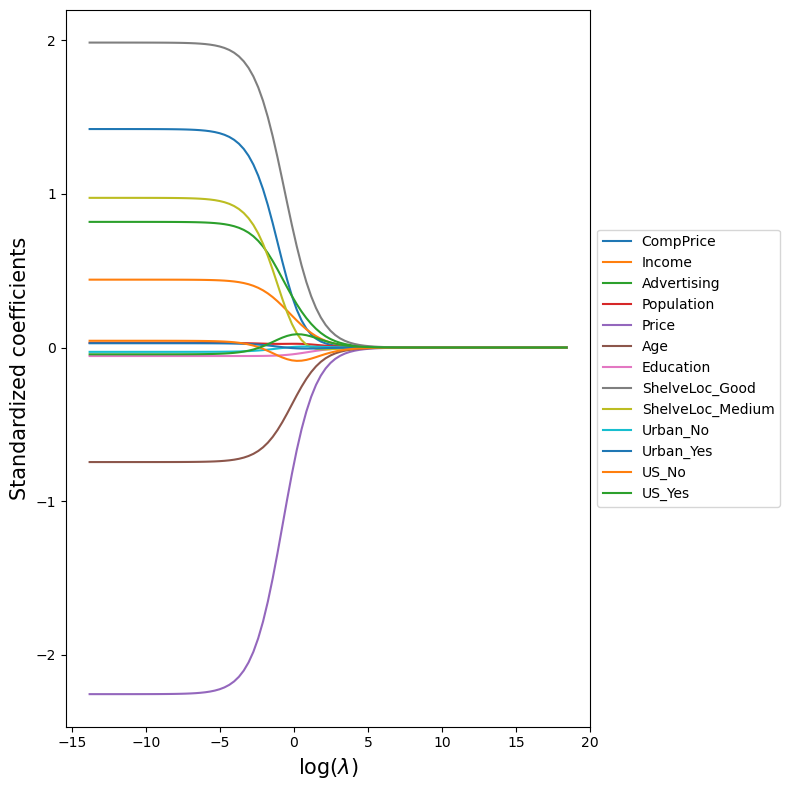

In [319]:
path_fig, ax = subplots(figsize=(8, 8))
soln_path.plot(ax=ax, legend=True)
ax.set_xlabel(r'$\log(\lambda)$', fontsize=15)
ax.set_ylabel('Standardized coefficients', fontsize=15)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
path_fig.tight_layout()

###### 1.2. Estimate the test error

Selecting a predetermined value of $\lambda$ can be challenging, if not impossible. It's preferable to employ validation methods or Cross-Validation to determine the optimal tuning parameter. We can use the ``GridSearchCV()`` to perform an exahustive grid seach to choose such a parameter. We follow these steps:

1. Define a Ridge Model using the `ElasticNet` function
2. Define the scaler using the ``StandardScaler`` function
3. Define a ``pipeline`` object to integrate the deployment of the model and the scaling into one step

In [321]:
ridge = skl.ElasticNet(l1_ratio=0)
scaler = StandardScaler(with_mean=True, with_std=True)
pipe = Pipeline(steps=[('scaler', scaler), ('ridge', ridge)])

Defined the pipeline we can tune the $\lambda$ parameter as follows:

1. Set a Cross-Validation approch. In this case we use the Validation Set approach
2. Define the regularization path of $\lambda$
3. Create a param_grid dictionary with ``ridge__alpha`` mapped to the array of lambda values
4. Define grid as a ``GridSearchCV`` object, configured with our pipeline, parameter grid, cross-validation strategy, and scoring metric.
5. Fit it to our data
6. Find the best estimator


In [323]:
validation = skm.ShuffleSplit(n_splits=1, test_size=0.5, random_state=0)
lambdas    = 10**np.linspace(8, -6, 100)
param_grid = {'ridge__alpha': lambdas}
grid       = skm.GridSearchCV(pipe, param_grid, cv=validation, scoring='neg_mean_squared_error')
grid.fit(X, Y)
# grid.best_params_['ridge__alpha']
grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', ElasticNet(alpha=0.03351602650938848, l1_ratio=0))])

We may want to use a different Cross Validation Approach. Let's try the K-Fold approach. Our scoring metric is Mean Square Error.

In [325]:
K          = 5
kfold      = skm.KFold(K, random_state=0, shuffle=True)
lambdas    = 10**np.linspace(8, -6, 100)
param_grid = {'ridge__alpha': lambdas}
grid       = skm.GridSearchCV(pipe, param_grid, cv=kfold, scoring='neg_mean_squared_error')
grid.fit(X, Y)
grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', ElasticNet(alpha=0.003430469286314926, l1_ratio=0))])

We can plot the Cross Validated MSE across different values of $\lambda$ by using the ``errorbar`` function. We use the following parameters:


- **X-axis (np.log(lambdas)):** Represents the logarithm of lambda values. This scaling makes it easier to see the results, especially when lambda changes a lot.

- **Y-axis (-grid.cv_results_['mean_test_score']):** Shows the negative mean squared error for each lambda. We use negative because, in this context, lower error values are better, and we want to display them as positive values on the graph.

- **Error Bars (yerr=grid.cv_results_['std_test_score'] / np.sqrt(K)):** The vertical lines on each point, showing the variability of the error. They represent the standard error, calculated from the standard deviation of the error over the cross-validation folds.

Text(0, 0.5, 'Cross-validated MSE')

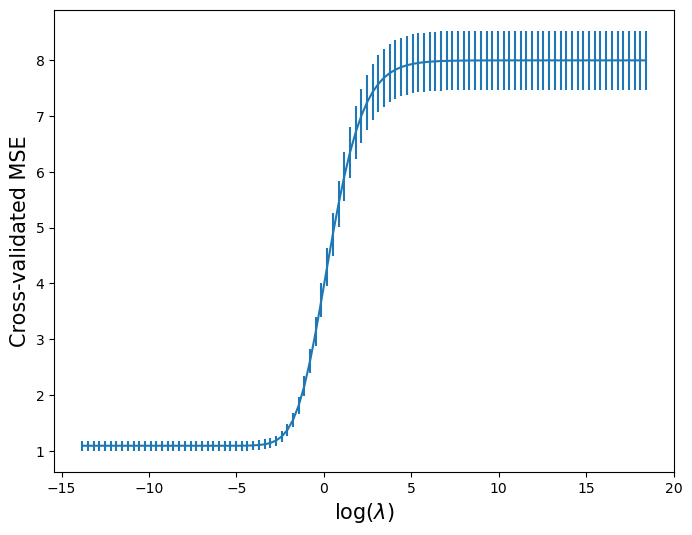

In [332]:
ridge_fig, ax = subplots(figsize=(8,6))
ax.errorbar(np.log(lambdas), -grid.cv_results_['mean_test_score'], yerr=grid.cv_results_['std_test_score'] / np.sqrt(K))
ax.set_xlabel(r'$\log(\lambda)$', fontsize=15)
ax.set_ylabel('Cross-validated MSE', fontsize=15)

###### 1.3. Finding the optimal $ \lambda$ by Cross-Validation with a Validation Set approach

While cross-validation is a reliable method for choosing the best $\lambda$, it uses all available data to fine-tune the model parameters. This leaves us without untouched data to objectively assess the model's performance.

To ensure we have an independent dataset for testing, we initially split the data into two separate sets: a training set and a test set. This separation ensures that the final evaluation of the model is on data that was never used during the model tuning process.

We then apply cross-validation on the training set to select the optimal λ. After tuning the model with cross-validation, we assess its performance on the separate test set. This strategy, known as *cross-validation nested within the validation set approach*, provides a more accurate estimate of how the model will perform on unseen data.

We start by splitting our data into ``train`` and ``test`` sets. We will assess the model's performance on the test set

In [335]:
target = [ 'Sales' ]
predictors = [ var for var in carseats.columns if var not in target ]

X_train, X_test, y_train, y_test = skm.train_test_split(carseats[predictors], carseats[target], test_size=0.25, random_state=1)
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

An effective way to deploy Cross-Validated Ridge models is to use the ``ElasticNetCV`` function. We follow these steps:

1. Set the Cross Validation strategy. In this case we use the K-Fold approach
2. Define the regularization path of $\lambda$
3. Define the scaler

In [337]:
cv = skm.KFold(n_splits=5, shuffle=True, random_state=0)
lambdas = 10**np.linspace(8, -6, 100)
scaler  = StandardScaler(with_mean=True, with_std=True)

We now deploy the model by:

4. Defining the Ridge model using the ``ElasticNetCV`` function. As with the ``ElasticNet`` function, ``0`` equals to Ridge and ``1`` equals to Lasso. Intermediate values equal to different configurations of Elastic Net.
5. Integrate the scaling and de model definition into a ``pipeCV`` object
6. Fit the model using the ``pipeCV`` object on the training data
7. Create the vector ``y_pred_ridge`` to store predictions over the test set

In [339]:
ridgeCV = skl.ElasticNetCV(alphas=lambdas, l1_ratio=0, cv=kfold)
pipeCV = Pipeline(steps=[('scaler', scaler), ('ridge', ridgeCV)])
pipeCV.fit(X_train, y_train)
y_pred_ridge = pipeCV.predict(X_test)

We now can plot the optimal value for $\lambda$ with the same parameters as above

Text(0, 0.5, 'Cross-validated MSE')

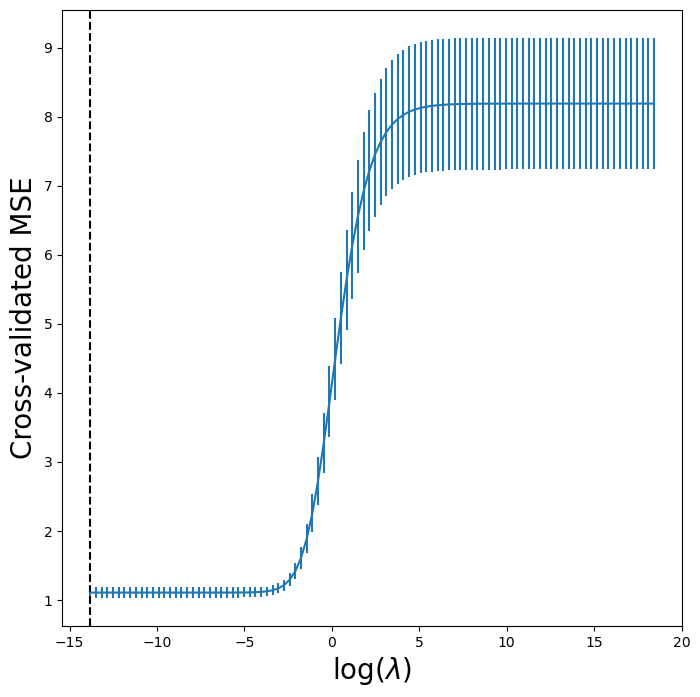

In [341]:
tuned_ridge = pipeCV.named_steps['ridge']
ridgeCV_fig, ax = subplots(figsize=(8,8))
ax.errorbar(np.log(lambdas), tuned_ridge.mse_path_.mean(1), yerr=tuned_ridge.mse_path_.std(1) / np.sqrt(K))
ax.axvline(np.log(tuned_ridge.alpha_), c='k', ls='--')
ax.set_xlabel(r'$\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20)

The optimal value of $\lambda$ is

In [345]:
selected_alpha = np.log(tuned_ridge.alpha_)
print(f'The optimal value of lambda is: {selected_alpha:.3f}')

The optimal value of lambda is: -13.816


We show the Cross Validation MSE asociated with the optimal $\lambda$:

In [348]:
np.min(tuned_ridge.mse_path_.mean(1))

1.1041310372876008

Now can estimate the test MSE for the optimal value of $\lambda$ as well

In [354]:
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'The MSE on the test set is: {mse_ridge:.5f}')

The MSE on the test set is: 1.13357


We can also take a look at the coefficients

In [357]:
ridge_coefs = tuned_ridge.coef_
ridge_df = pd.DataFrame({'Variable': X.columns,'Coefficient': ridge_coefs})
ridge_df = ridge_df.sort_values(by='Coefficient', ascending=False)
ridge_df

,Variable,Coefficient
7,ShelveLoc_Good,2.073185
0,CompPrice,1.429327
8,ShelveLoc_Medium,1.025700
2,Advertising,0.838511
1,Income,0.392376
11,US_No,0.114480
10,Urban_Yes,0.000089
12,US_Yes,-0.000115
3,Population,-0.039175
6,Education,-0.057915


##### **2) Lasso Regression**

Let's fit a model and extract an array of coefficient corresponding to the solutions along the regularization path, the same way as we did we the Ridge model. We change the ``l1_ratio`` argument to ``1``

In [361]:
Xs = scaler.fit_transform(X)
lambdas = 10**np.linspace(8, -6, 100)
soln_array = skl.ElasticNet.path(Xs, Y, l1_ratio=1, alphas=lambdas)[1]

We then build a Pandas DataFrame to visualize the coefficients

In [363]:
soln_path = pd.DataFrame(soln_array.T, columns=X.columns, index=np.log(lambdas))
soln_path.index.name = 'negative log(lambda)'
soln_path

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
negative log(lambda),,,,,,,,,,,,,
18.420681,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000e+00,-0.000000,0.000000e+00
18.095063,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000e+00,-0.000000,0.000000e+00
17.769445,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000e+00,-0.000000,0.000000e+00
17.443826,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000e+00,-0.000000,0.000000e+00
17.118208,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000e+00,-0.000000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
-12.513038,1.421488,0.441701,0.817592,0.030596,-2.254924,-0.745008,-0.055225,1.984087,0.973924,-0.056037,2.833967e-13,0.088079,-1.773926e-13
-12.838656,1.421491,0.441702,0.817595,0.030596,-2.254927,-0.745010,-0.055226,1.984090,0.973926,-0.056038,2.926232e-13,0.088082,-1.833684e-13
-13.164274,1.421493,0.441703,0.817598,0.030597,-2.254928,-0.745010,-0.055227,1.984092,0.973928,-0.056039,3.016968e-13,0.088085,-1.892978e-13


We can plot how coefficients vary across different values of $\lambda$

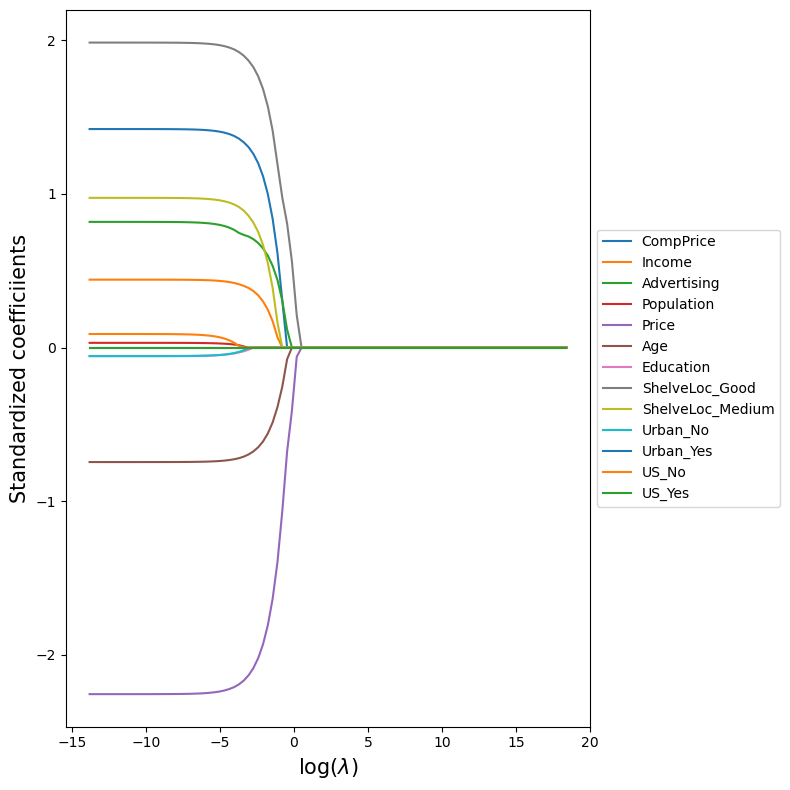

In [365]:
path_fig, ax = subplots(figsize=(8,8))
soln_path.plot(ax=ax, legend=False)
ax.legend(loc='upper left')
ax.set_xlabel(r'$\log(\lambda)$', fontsize=15)
ax.set_ylabel('Standardized coefficiients', fontsize=15)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
path_fig.tight_layout()

Now let's use the ``ElasticNetCV`` to fastly deploy the Lasso Model through the *cross-validation nested within the validation set approach*. We first define the arguments,  fit the model and make predictions:

In [369]:
kfold   = skm.KFold(n_splits=5, random_state=0, shuffle=True)
lambdas = 10**np.linspace(8, -6, 100)
scaler  = StandardScaler(with_mean=True, with_std=True)
lassoCV = skl.ElasticNetCV(alphas=lambdas, l1_ratio=1,cv=kfold)
pipeCV_lasso = Pipeline(steps=[('scaler', scaler), ('lasso', lassoCV)])
pipeCV_lasso.fit(X_train, y_train)
y_pred_lasso = pipeCV_lasso.predict(X_test)

We can produce a plot for Cross-Validation errors

Text(0, 0.5, 'Cross-validated MSE')

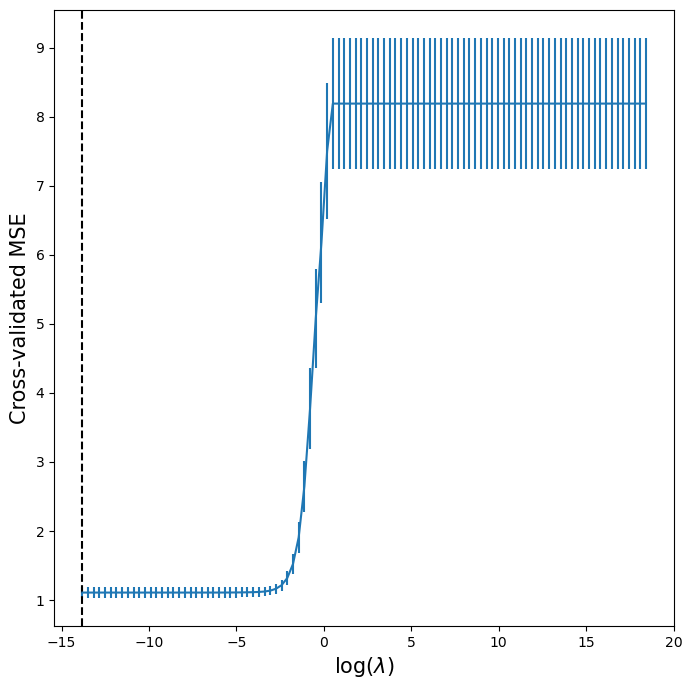

In [371]:
tuned_lasso = pipeCV_lasso.named_steps['lasso']
lassoCV_fig, ax = subplots(figsize=(8,8))
ax.errorbar(np.log(tuned_lasso.alphas_), tuned_lasso.mse_path_.mean(1), yerr=tuned_lasso.mse_path_.std(1) / np.sqrt(K))
ax.axvline(np.log(tuned_lasso.alpha_), c='k', ls='--')
ax.set_xlabel(r'$\log(\lambda)$', fontsize=15)
ax.set_ylabel('Cross-validated MSE', fontsize=15)

This is the optimal value for $\lambda$

In [373]:
selected_alpha = np.log(tuned_lasso.alpha_)
print(f'The optimal value of lambda is: {selected_alpha:.3f}')

The optimal value of lambda is: -13.816


We show the Cross Validation MSE asociated for this value of $\lambda$:

In [375]:
np.min(tuned_lasso.mse_path_.mean(1))

1.104131092818072

We now estimate the test MSE for the optimal value of $\lambda$

In [377]:
mse_lasso = round(mean_squared_error(y_test, y_pred_lasso), 3)
print(f'The MSE on the test set is: {mse_lasso:.5f}')

The MSE on the test set is: 1.13400


And finally we show the optimal coefficients

In [379]:
lasso_coefs = tuned_lasso.coef_
lasso_df    = pd.DataFrame({'Variable': X.columns,'Coefficient': lasso_coefs})
lasso_df    = lasso_df.sort_values(by='Coefficient', ascending=False)
lasso_df

,Variable,Coefficient
7,ShelveLoc_Good,2.073187e+00
0,CompPrice,1.429329e+00
8,ShelveLoc_Medium,1.025701e+00
2,Advertising,8.385097e-01
1,Income,3.923754e-01
11,US_No,1.145927e-01
10,Urban_Yes,0.000000e+00
12,US_Yes,-6.872378e-17
3,Population,-3.917381e-02
6,Education,-5.791352e-02


##### **3) Discuss the results**

* Both Ridge and Lasso use regularization to reduce model variance and prevent overfitting. In the case of Ridge, the coefficients of the variables are not reduced exactly to zero, meaning it includes all variables but assigns them different weights. In contrast, Lasso tends to set certain coefficients to zero when they do not contribute significantly to the prediction.

###### 3.1. RIDGE

In [381]:
ridge_df

,Variable,Coefficient
7,ShelveLoc_Good,2.073185
0,CompPrice,1.429327
8,ShelveLoc_Medium,1.025700
2,Advertising,0.838511
1,Income,0.392376
11,US_No,0.114480
10,Urban_Yes,0.000089
12,US_Yes,-0.000115
3,Population,-0.039175
6,Education,-0.057915


###### 3.2. LASSO

In [383]:
lasso_df

,Variable,Coefficient
7,ShelveLoc_Good,2.073187e+00
0,CompPrice,1.429329e+00
8,ShelveLoc_Medium,1.025701e+00
2,Advertising,8.385097e-01
1,Income,3.923754e-01
11,US_No,1.145927e-01
10,Urban_Yes,0.000000e+00
12,US_Yes,-6.872378e-17
3,Population,-3.917381e-02
6,Education,-5.791352e-02


* The estimation of error in the validation set and cross-validation has allowed for the selection of the regularization parameter 𝜆, which minimizes the mean squared error (MSE).

In [385]:
print(f'The MSE ridge on the test set is: {mse_ridge:.6f}')

The MSE ridge on the test set is: 1.133565


In [387]:
print(f'The MSE lasso on the test set is: {mse_lasso:.6f}')

The MSE lasso on the test set is: 1.134000


#### **b)** Proponga un modelo (o conjunto de modelos) que parezca funcionar bien en este conjunto de datos y justifique su respuesta. Asegúrese de que está evaluando el desempeño del modelo utilizando el error del conjunto de validación, la validación cruzada o alguna otra alternativa razonable, en lugar del error de entrenamiento.

* In summary, after evaluating the MSE on the test set and considering the nature of the data, the Ridge model is the most suitable for this dataset, as it performs better by presenting the lowest MSE

In [390]:
print(f'The MSE ridge on the test set is: {mse_ridge:.6f}')
print(f'The MSE lasso on the test set is: {mse_lasso:.6f}')

The MSE ridge on the test set is: 1.133565
The MSE lasso on the test set is: 1.134000


#### **c)** ¿Su modelo elegido involucra todas las variables de la base de datos? ¿Por qué o por qué no?

* In conclusion, the Ridge model includes all the variables from the dataset, although some may have smaller coefficients. Unlike Lasso, which can reduce the coefficients of some variables to zero.

In [392]:
ridge_df

,Variable,Coefficient
7,ShelveLoc_Good,2.073185
0,CompPrice,1.429327
8,ShelveLoc_Medium,1.025700
2,Advertising,0.838511
1,Income,0.392376
11,US_No,0.114480
10,Urban_Yes,0.000089
12,US_Yes,-0.000115
3,Population,-0.039175
6,Education,-0.057915
